In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
reservations = pd.read_csv("my_data_2024_full/reservations.csv")
room_reservations = pd.read_csv("my_data_2024_full/room_reservations.csv")
room_name = pd.read_csv("my_data_2024_full/room_name.csv")
customers_data = pd.read_csv("my_data_2024_full/customers_data.csv")
customers_reservations = pd.read_csv("my_data_2024_full/customers_reservations.csv")



# Diccionario para mapear los tipos de habitaciones a sus nombres
mapping = {
    15507: 'shared',
    15504: 'shared',
    15505: 'shared',
    23197: 'individual shared bathroom',
    15508: 'double shared bathroom',
    15509: 'double privated bathroom',
   # 15510: 'double privated bathroom e',
    15510: 'double privated bathroom',
    23174: 'double e shared bathroom',
    23175: 'individual private bathroom',
    33902: 'TBC',
    #68222: 'individual private bathroom e'
   68222: 'individual private bathroom'
    
}

# Crear la nueva columna utilizando el diccionario
room_name['id_name_type'] = room_name['id_room_type'].map(mapping)

room_name['name'] = room_name['name'].replace('DEBP', '216')



reservations['created_date'] = pd.to_datetime(reservations['created_date'], format= '%d/%m/%Y')
reservations['status'] = pd.Categorical(reservations['status'])
reservations['channel'] = pd.Categorical(reservations['channel'])


In [3]:
## Tasa de ocupacion por habitacion
import pandas as pd

room_reservations = pd.merge(room_reservations, reservations, how='left', left_on='id_reserva', right_on='id')
room_reservations = room_reservations[room_reservations['status'] == 'Confirmed']

# Convertir las fechas a datetime
room_reservations['start_date'] = pd.to_datetime(room_reservations['start_date'], format= '%d/%m/%Y')
room_reservations['end_date'] = pd.to_datetime(room_reservations['end_date'], format= '%d/%m/%Y')

room_reservations = room_reservations[room_reservations['start_date'] <  pd.to_datetime('2024-08-20') ]
room_reservations = room_reservations[room_reservations['start_date'] >  pd.to_datetime('2024-01-01') ]

max_start_date = room_reservations['start_date'].max()
min_start_date = room_reservations['start_date'].min()

total_days = (max_start_date - min_start_date).days

room_reservations['days'] = (room_reservations['end_date'] - room_reservations['start_date']).dt.days 
room_reservations['total_days_between_dates'] = total_days



room_reservations_sum = room_reservations.groupby(['id_zak_room', 'total_days_between_dates']).agg({
    'days': 'sum',
    'total_price': 'sum'
}).reset_index().rename(columns={
    'days': 'total_days_per_room',
    'total_price': 'total_price_per_room'
})

room_reservations_sum['occupation'] = (room_reservations_sum['total_days_per_room'] / room_reservations_sum['total_days_between_dates'])*100

room_occupation_proportion = pd.merge(room_reservations_sum, room_name, how='left', left_on='id_zak_room', right_on='id')


proportions_summary = room_occupation_proportion.groupby('id_name_type').agg({
    'total_days_per_room': 'sum',
    'total_days_between_dates': 'sum',
    'total_price_per_room' : 'sum',
    'id_zak_room': 'nunique'
}).reset_index()

proportions_summary['occupation_proportion'] = proportions_summary['total_days_per_room']/proportions_summary['total_days_between_dates']
proportions_summary['average_price'] = proportions_summary['total_price_per_room']/proportions_summary['total_days_per_room']

proportions_summary


,id_name_type,total_days_per_room,total_days_between_dates,total_price_per_room,id_zak_room,occupation_proportion,average_price
0,TBC,156,230,1.875624e+07,1,0.678261,120232.323355
1,double e shared bathroom,318,460,4.706159e+07,2,0.691304,147992.411695
2,double privated bathroom,888,1840,1.261893e+08,8,0.482609,142105.055189
3,double shared bathroom,333,460,3.466281e+07,2,0.723913,104092.514555
4,individual private bathroom,524,690,3.690579e+07,3,0.759420,70430.899890
5,individual shared bathroom,1238,1610,9.073316e+07,7,0.768944,73290.112690
6,shared,2837,5980,1.703876e+08,26,0.474415,60059.059715


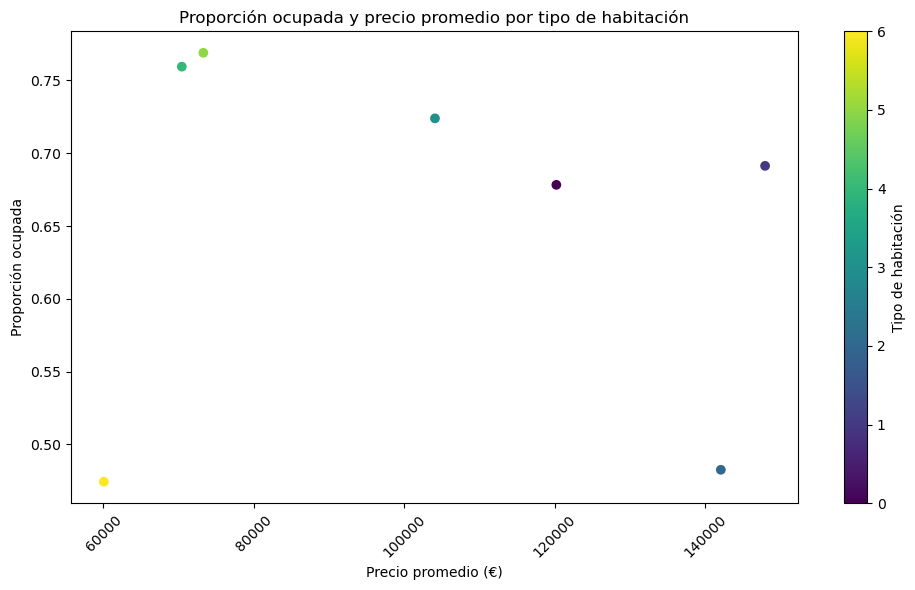

In [13]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para mostrar la relación entre el tipo de habitación, la proporción ocupada y el precio promedio
plt.figure(figsize=(10, 6))
plt.scatter(proportions_summary['average_price'], proportions_summary['occupation_proportion'], c=proportions_summary['id_name_type'].map({'TBC': 0, 'double e shared bathroom': 1, 'double privated bathroom': 2, 'double shared bathroom': 3, 'individual private bathroom': 4, 'individual shared bathroom': 5, 'shared': 6}), cmap='viridis')
plt.xlabel('Precio promedio (€)')
plt.ylabel('Proporción ocupada')
plt.title('Proporción ocupada y precio promedio por tipo de habitación')
plt.colorbar(label='Tipo de habitación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean más legibles
plt.tight_layout()  # Ajustar el tamaño del gráfico para que se vea bien
plt.show()

In [ ]:

print("reservations")
print(reservations)
print("\n\n\n")
print("room_reservations")

print(room_reservations)
print("\n\n\n")
print("customers_reservations")
print(customers_reservations)
print("\n\n\n")


print("room_name")
print(room_name)
print("\n\n\n")
